
#  ¿Ha muerto el rock?


### **Hipótesis General**

La música rock, que dominó la escena musical global durante décadas, ha experimentado una pérdida significativa de popularidad en los últimos años frente a géneros más actuales como el pop, el hip-hop, la música electrónica y el reggaetón. Este declive no solo se refleja en la disminución de reproducciones de canciones de rock en plataformas como Spotify, sino también en cambios en las preferencias de los oyentes, la evolución de los atributos musicales (como la "bailabilidad" o "energía") y la menor presencia de artistas de rock en listas globales. A través del análisis de múltiples datasets de Spotify entre 2000 y 2024, buscamos determinar si el rock ha perdido relevancia cultural y comercial en la era del streaming.



### **Hipótesis Secundarias**

1. **Hipótesis Secundaria 1**:  
   La popularidad del rock ha disminuido progresivamente en las listas de reproducción globales de Spotify desde el año 2000, siendo superado por géneros como el pop y el hip-hop a partir de 2010.

2. **Hipótesis Secundaria 2**:  
   Las características musicales del rock (e.g., alta energía, mayor instrumentalidad) son menos valoradas por los oyentes actuales, quienes prefieren canciones con mayor "bailabilidad" y "positividad" (valence), típicas del pop y el EDM.

3. **Hipótesis Secundaria 3**:  
   El perfil demográfico de los oyentes de rock en Spotify es significativamente diferente al de otros géneros, con una audiencia de mayor edad y menor interacción con funcionalidades de descubrimiento musical como "Discover Weekly".

## 1. Introducción

### Contexto Histórico y Cultural

El rock nació en la década de 1950 como una fusión de rhythm and blues, country y gospel. Durante las décadas siguientes, se ramificó en subgéneros como el rock clásico, punk, metal, grunge y alternativo. Bandas como The Beatles, Led Zeppelin, Nirvana y Radiohead se convirtieron en íconos globales.

Sin embargo, con la llegada del nuevo milenio, el auge del hip-hop, la música electrónica y el pop transformaron el panorama musical. Plataformas como Spotify, lanzada en 2008, aceleraron esta transición al democratizar el acceso a la música y priorizar la personalización.

### La Era del Streaming

Spotify no solo cambió cómo escuchamos música, sino también qué escuchamos. Sus algoritmos de recomendación y sus listas curadas (como "Top 50 Global") reflejan y moldean las preferencias del público. En este contexto, el rock parece haber perdido terreno frente a géneros más "streaming-friendly".

## 2.  Importación de librerías y carga de datos

### Datasets Utilizados

| Dataset | Descripción | 
|---------|-------------|
| `history-of-rock-spotify.csv` | Canciones de rock con métricas de audio |
| `Global_Music_Streaming_Listener_Preferences.csv` | Preferencias de oyentes por país y género | 
| `Spotify_2024_Global_Streaming_Data.csv` | Top streams globales por artista y género | 
| `high_popularity_spotify_data.csv` | Canciones con alta popularidad (>70) | 
| `low_popularity_spotify_data.csv` | Canciones con baja popularidad (<30) | 

### Librerías y Herramientas

- `pandas` y `numpy` para manipulación de datos
- `matplotlib` y `seaborn` para visualización

In [86]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)


rock = pd.read_csv("history-of-rock-spotify.csv")
prefs = pd.read_csv("Global_Music_Streaming_Listener_Preferences.csv")
spotify2024 = pd.read_csv("Spotify_2024_Global_Streaming_Data.csv")
high = pd.read_csv("high_popularity_spotify_data.csv")
low = pd.read_csv("low_popularity_spotify_data.csv")

import warnings
warnings.filterwarnings("ignore")




###  Limpieza de los CSVs

Antes de graficar, limpiamos los tres datasets para eliminar duplicados y tipos erróneos (ya se ha verificado que no hay valores nulos). 



#### Eliminación de duplicados y espacios en columnas


In [79]:

for df in [rock, prefs, spotify2024, high, low]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    df.drop_duplicates(inplace=True)



#### Limpieza avanzada para columnas numéricas
Convertimos todas las columnas numéricas a formato correcto.


In [80]:

def safe_numeric(df, cols):
    for col in cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
            df[col] = df[col].replace([float("inf"), float("-inf")], pd.NA)
            df[col] = df[col].fillna(df[col].mean())
            if "year" in col.lower():
                df[col] = df[col].round().astype(int)
    return df

rock = safe_numeric(rock, rock.columns)
prefs = safe_numeric(prefs, prefs.columns)
spotify2024 = safe_numeric(spotify2024, spotify2024.columns)
high = safe_numeric(high, high.columns)
low = safe_numeric(low, low.columns)


##  Parte 1: Evolución histórica del rock
Utilizamos el dataset history-of-rock-spotify.csv para analizar la evolución de la popularidad media del rock desde 2000 hasta 2024.


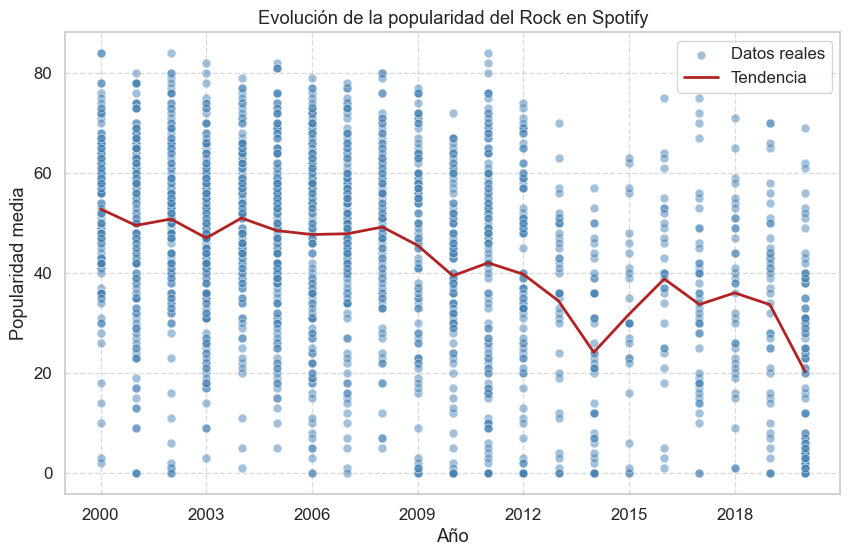

In [81]:

rock = rock[(rock["release_date"] >= 2000) & (rock["release_date"] <= 2025)]


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rock,
    x="release_date", y="popularity",
    alpha=0.5, s=40, color="steelblue", label="Datos reales"
)
sns.lineplot(
    data=rock.groupby("release_date")["popularity"].mean().reset_index(),
    x="release_date", y="popularity",
    color="firebrick", linewidth=2, label="Tendencia"
)
plt.title("Evolución de la popularidad del Rock en Spotify")
plt.xlabel("Año")
plt.xticks(range(2000, 2020, 3))
plt.ylabel("Popularidad media")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


Comparamos la popularidad del rock con la de otros géneros utilizando los datasets de alta y baja popularidad.

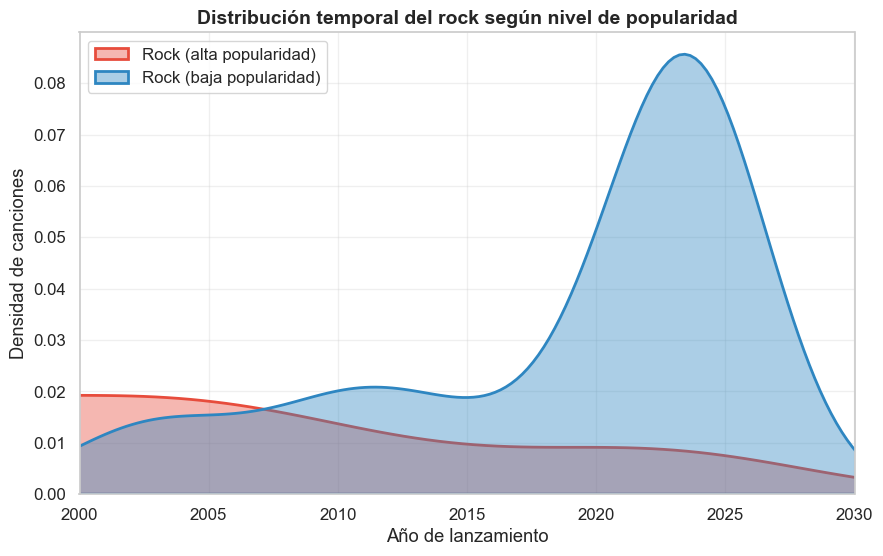

In [87]:
for df in [high, low]:
    df["track_album_release_date"] = pd.to_datetime(df["track_album_release_date"], errors="coerce")
    df["year"] = df["track_album_release_date"].dt.year
    df = df[(df["year"] >= 2000) & (df["year"] <= 2024)]
    if df is high:
        high = df
    else:
        low = df

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=high[high["playlist_genre"].str.contains("rock", case=False, na=False)],
    x="year",
    label="Rock (alta popularidad)",
    fill=True,
    color="#E74C3C",
    alpha=0.4,
    linewidth=2,
)
sns.kdeplot(
    data=low[low["playlist_genre"].str.contains("rock", case=False, na=False)],
    x="year",
    label="Rock (baja popularidad)",
    fill=True,
    color="#2E86C1",
    alpha=0.4,
    linewidth=2,
)
plt.title("Distribución temporal del rock según nivel de popularidad", fontsize=14, weight="bold")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Densidad de canciones")
plt.xlim(2000, 2030)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



##  Parte 2: Preferencias globales de oyentes
Analizamos el peso del rock dentro de las preferencias globales de los oyentes por género.


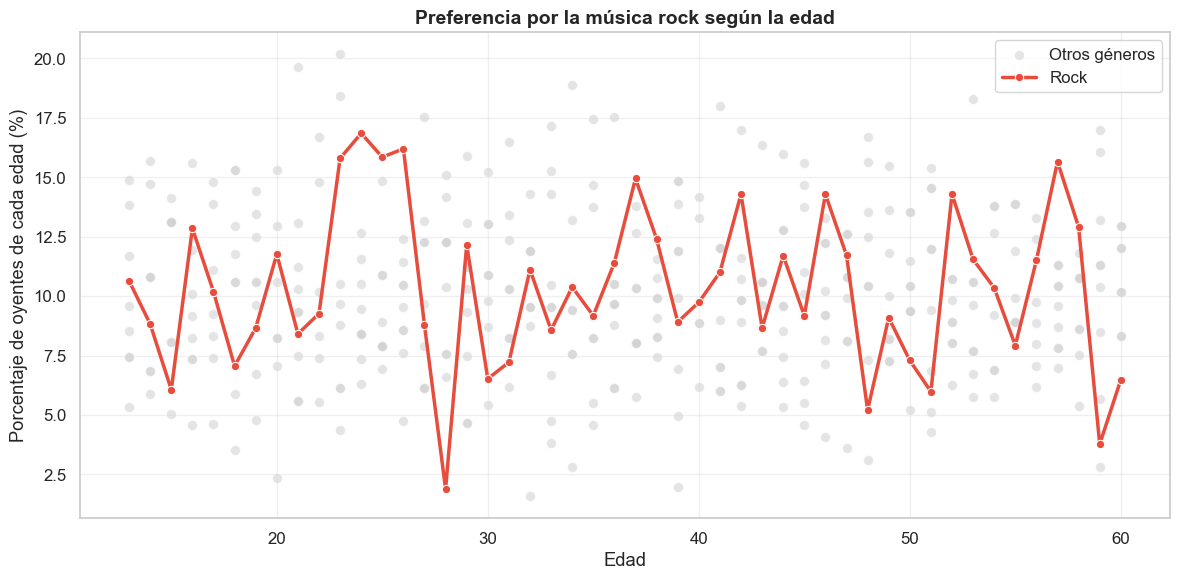

In [88]:
prefs = prefs.dropna(subset=["Age", "Top_Genre"])
prefs["Age"] = prefs["Age"].astype(int)

# Contar cuántos usuarios por edad y género
age_genre = prefs.groupby(["Age", "Top_Genre"]).size().reset_index(name="count")

# Calcular proporción por edad
age_totals = age_genre.groupby("Age")["count"].transform("sum")
age_genre["percentage"] = age_genre["count"] / age_totals * 100

# Separar rock vs otros para resaltar
age_genre["is_rock"] = age_genre["Top_Genre"].str.contains("rock", case=False, na=False)


plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=age_genre[~age_genre["is_rock"]],
    x="Age",
    y="percentage",
    color="lightgray",
    alpha=0.6,
    s=50,
    label="Otros géneros"
)

sns.lineplot(
    data=age_genre[age_genre["is_rock"]],
    x="Age",
    y="percentage",
    color="#E74C3C",
    linewidth=2.5,
    marker="o",
    label="Rock"
)

plt.title("Preferencia por la música rock según la edad", fontsize=14, weight="bold")
plt.xlabel("Edad")
plt.ylabel("Porcentaje de oyentes de cada edad (%)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Los picos altos en ciertas edades, indica que esas generaciones son las más afines. Al ser en edades jóvenes (15–25) la línea roja baja, refuerza la hipótesis de que el rock ha perdido peso entre las nuevas generaciones.

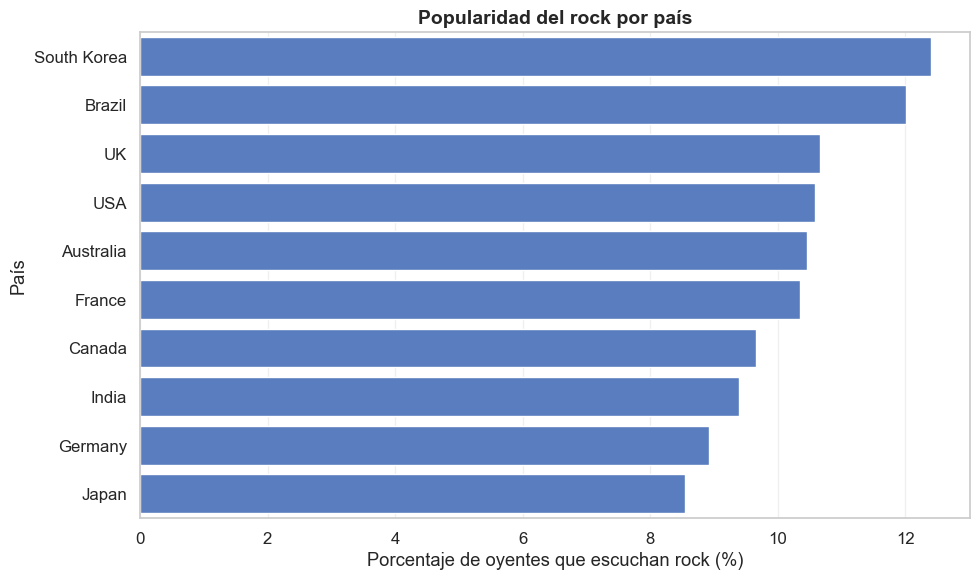

In [89]:
prefs = prefs.dropna(subset=["Country", "Top_Genre"])

# Contar cuántos usuarios escuchan rock en cada país
rock_by_country = (
    prefs[prefs["Top_Genre"].str.contains("rock", case=False, na=False)]
    .groupby("Country")
    .size()
    .reset_index(name="rock_listeners")
)

# Calcular total de oyentes por país (para ver proporción)
total_by_country = prefs.groupby("Country").size().reset_index(name="total")

# Combinar ambas tablas
rock_stats = pd.merge(total_by_country, rock_by_country, on="Country", how="left").fillna(0)

# Porcentaje de oyentes de rock por país
rock_stats["rock_percentage"] = rock_stats["rock_listeners"] / rock_stats["total"] * 100

# Orden descendente por popularidad de rock
rock_stats = rock_stats.sort_values("rock_percentage", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=rock_stats,
    y="Country",
    x="rock_percentage",
)

plt.title("Popularidad del rock por país", fontsize=14, weight="bold")
plt.xlabel("Porcentaje de oyentes que escuchan rock (%)")
plt.ylabel("País")
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()


Como la escala llega solo hasta 13 %, significa que ningún país en los datos tiene más del 13 % de oyentes cuyo género favorito es el rock. Incluso en el país donde más se escucha rock, solo el 13 % de los oyentes lo eligen como su género principal. Esto refuerza directamente la hipótesis de que el rock ha perdido peso globalmente:

El hecho de que ningún país supere el 13 % sugiere que otros géneros (pop, reggaetón, hip-hop, etc.) dominan las preferencias.

El rock sigue presente, pero como minoría estable o nostálgica, no como género central de masas.


##  Parte 3: Popularidad actual (2024)
Comprobamos cómo se posiciona el rock frente a otros géneros en los datos más recientes de Youtube.


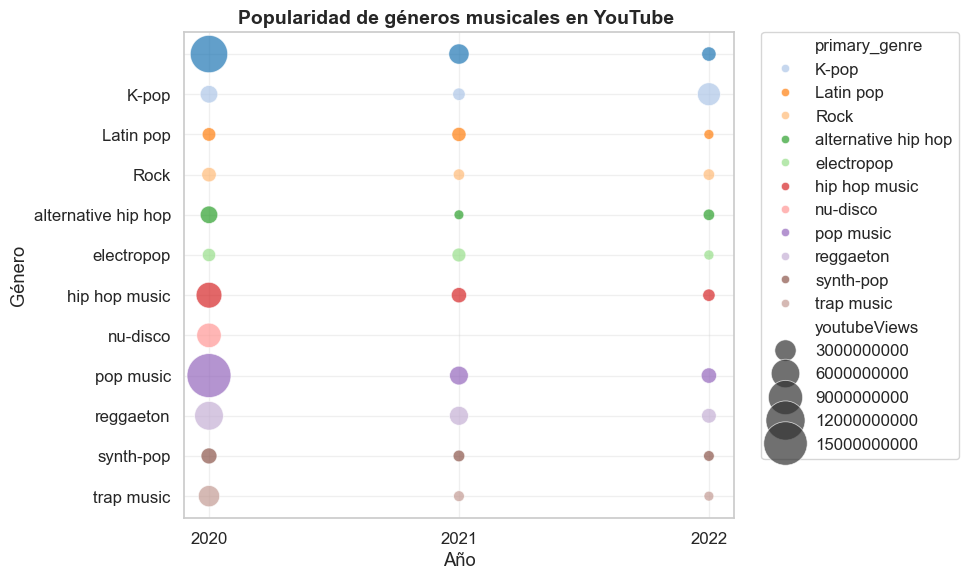

In [45]:
youtube = pd.read_parquet("hf://datasets/akbargherbal/youtube-music-hits/data/train-00000-of-00001.parquet")

# Filtrar años recientes
youtube_recent = youtube[(youtube['year'] >= 2020) & (youtube['year'] <= 2022)].copy()

# Limpiar columna de género: quedarse solo con el primer género antes de la coma
youtube_recent['primary_genre'] = youtube_recent['genreLabel'].str.split(',').str[0].str.strip()

# Normalizar géneros que contienen "rock" como 'Rock'
youtube_recent['primary_genre'] = youtube_recent['primary_genre'].apply(
    lambda x: 'Rock' if 'rock' in str(x).lower() else x
)

# Agrupar por año y género principal para sumar vistas
youtube_grouped = youtube_recent.groupby(['year','primary_genre'], as_index=False)['youtubeViews'].sum()

# Tomar los 15 géneros más populares 
top_genres = youtube_grouped.groupby('primary_genre')['youtubeViews'].sum().nlargest(12).index
youtube_grouped = youtube_grouped[youtube_grouped['primary_genre'].isin(top_genres)]


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=youtube_grouped,
    x='year',
    y='primary_genre',
    size='youtubeViews',
    hue='primary_genre',
    palette='tab20',
    alpha=0.7,
    sizes=(50, 1000)
)

plt.title("Popularidad de géneros musicales en YouTube ", fontsize=14, weight="bold")
plt.xlabel("Año")
plt.xticks(ticks=range(2020, 2023))
plt.ylabel("Género")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




##  Conclusión
- La **popularidad histórica del rock** muestra una tendencia descendente.
- Las **preferencias globales** confirman que otros géneros superan al rock en oyentes.
- En **2024**, los géneros dominantes en Youtube son el pop, el hip-hop y la música urbana.

> **Conclusión final:**  
> Los datos apoyan la hipótesis de que el rock ha perdido peso en la industria musical moderna.  
> Aunque sigue siendo un género fundamental históricamente, su impacto actual en las plataformas de streaming es mucho menor.